In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.update()
Pkg.instantiate()

  Activating environment at `~/JuliaProjects/Clustering-ToMaTo/Project.toml`
    Updating registry at `~/.julia/registries/General`
  No Changes to `~/JuliaProjects/Clustering-ToMaTo/Project.toml`
  No Changes to `~/JuliaProjects/Clustering-ToMaTo/Manifest.toml`
Precompiling project...
  ✓ ClusteringToMaTo
  1 dependency successfully precompiled in 7 seconds (122 already precompiled)


In [14]:
using Distances
using DataStructures
using NearestNeighbors
using Plots
using RData
using DelimitedFiles
using Revise

In [15]:
using ClusteringToMaTo

In [16]:
data2clust(rand(100,2),2,0.5,20,0.2)

1-element Vector{Any}:
 (33, [33, 75, 37, 9, 90, 56, 41, 8, 16, 98  …  82, 55, 53, 25, 38, 73, 86, 50, 22, 59])

In [18]:
A=readdlm(joinpath("FCPS","01FCPSdata","TwoDiamonds.lrn"))
A=float.(A[5:end,2:3])

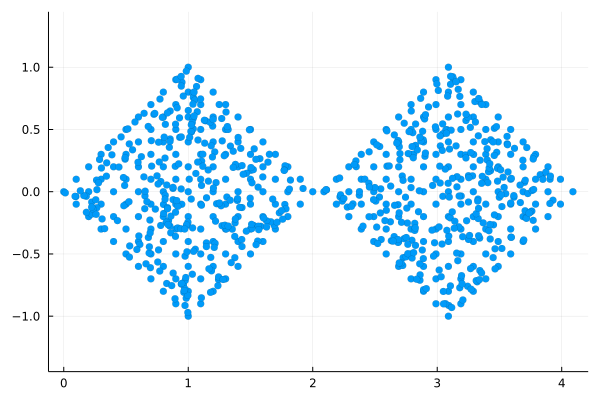

In [19]:
scatter(A[:,1],A[:,2],ms=4,aspect_ratio=:equal,markerstrokewidth=0.1,label="")

In [34]:
@time U, V = data2clust(A, 2, 0.5, 20, 0.2)

  0.021430 seconds (107.36 k allocations: 8.084 MiB)


2-element Vector{Any}:
 (349, [349, 277, 285, 196, 174, 363, 330, 272, 333, 40  …  169, 119, 116, 120, 121, 228, 111, 11, 5, 1])
 (786, [732, 786, 708, 588, 706, 704, 418, 554, 713, 683  …  633, 434, 477, 489, 520, 466, 510, 411, 511, 521])

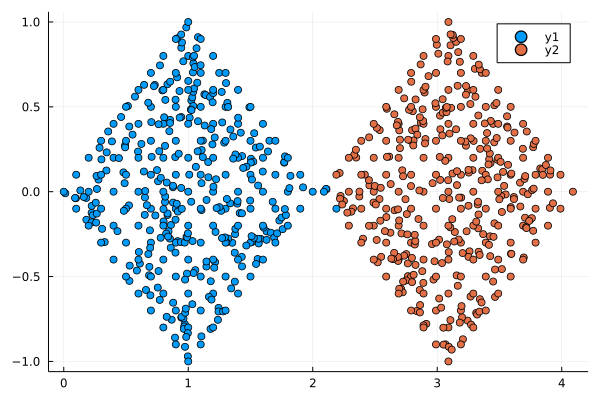

In [35]:
scatter(A[U[2],1], A[U[2], 2])
scatter!(A[V[2],1], A[V[2], 2])

In [37]:
B = readdlm(joinpath("FCPS","01FCPSdata","Lsun.lrn"))

404×4 Matrix{Any}:
    "%"  400          ""        ""
    "%"    3          ""        ""
    "%"    9         1         1
    "%"     "Key"     "C1"      "C2"
   1       3.2777    0.814082   ""
   2       0.387577  0.17678    ""
   3       0.268546  0.582963   ""
   4       2.03114   0.244597   ""
   5       0.188677  0.46128    ""
   6       3.52547   0.265579   ""
   7       2.22958   0.682189   ""
   8       3.39207   0.420976   ""
   9       3.58982   0.832527   ""
   ⋮                           
 389       2.87321   3.18885    ""
 390       2.67861   2.33508    ""
 391       2.76765   2.72605    ""
 392       2.28857   2.79594    ""
 393       3.37523   2.58806    ""
 394       3.36667   3.02512    ""
 395       2.8496    2.75166    ""
 396       2.63609   2.05681    ""
 397       2.9383    2.3212     ""
 398       3.08091   2.2096     ""
 399       2.40452   2.64162    ""
 400       3.24865   2.29729    ""

In [38]:
B = float.(B[5:end,2:3]);
size(B)

(400, 2)

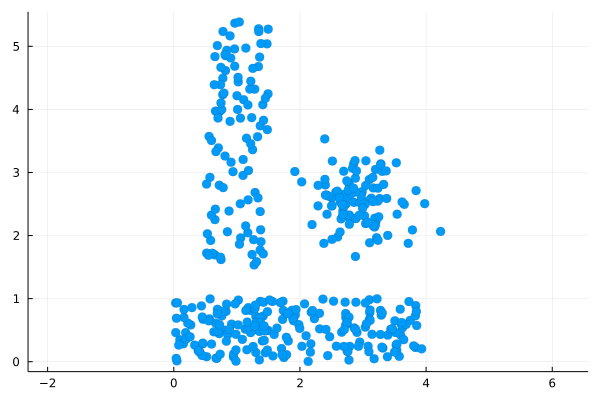

In [39]:
scatter(B[:,1],B[:,2],ms=2000/size(B,1),
    aspect_ratio=:equal,markerstrokewidth=0.1,label="")

In [40]:
@time S = data2clust(B,1,5,5,0.4)

  0.125627 seconds (157.19 k allocations: 9.438 MiB, 95.96% compilation time)


3-element Vector{Any}:
 (201, [201, 234, 250, 204, 207, 270, 288, 279, 219, 227  …  269, 265, 210, 261, 290, 228, 212, 240, 202, 280])
 (167, [93, 131, 120, 154, 167, 141, 161, 65, 188, 185  …  34, 152, 108, 49, 198, 165, 102, 118, 78, 96])
 (313, [313, 320, 369, 375, 371, 374, 349, 353, 352, 385  …  337, 338, 301, 322, 324, 327, 354, 305, 345, 329])

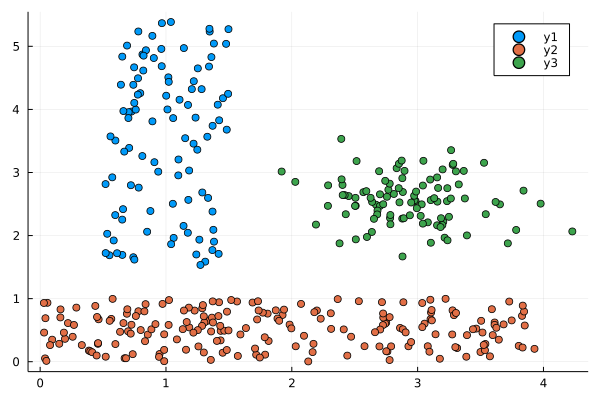

In [41]:
s1, s2, s3 = getindex.(S, 2)

scatter(B[s1,1], B[s1, 2])
scatter!(B[s2,1], B[s2, 2])
scatter!(B[s3,1], B[s3, 2])

In [42]:
C = readdlm(joinpath("FCPS","01FCPSdata","Atom.lrn"))

804×5 Matrix{Any}:
    "%"  800            ""          ""         ""
    "%"    4            ""          ""         ""
    "%"    9           1           1          1
    "%"     "Key"       "C1"        "C2"       "C3"
   1      -4.82249   -50.4022      4.02086     ""
   2     -44.4601     20.9647    -11.4921      ""
   3      50.001       0.780748    9.13446     ""
   4     -41.6991    -22.3101     16.3141      ""
   5       4.42524    -4.66666    50.2237      ""
   6      27.2606     23.386      35.0677      ""
   7     -19.988      -6.63806    45.8682      ""
   8      47.5704     -1.57132    15.8721      ""
   9      41.8764     10.8302     24.6442      ""
   ⋮                                          
 789       0.368317   -0.621024    2.45239     ""
 790       1.7288      0.422616    0.0725509   ""
 791       7.14411     3.70875    -2.43296     ""
 792      -0.297787    0.619521   -0.554863    ""
 793      -3.20386    -2.27513    -0.694515    ""
 794      -1.5658      0.520958   

In [43]:
C=float.(C[5:end,2:4]);
size(C)

(800, 3)

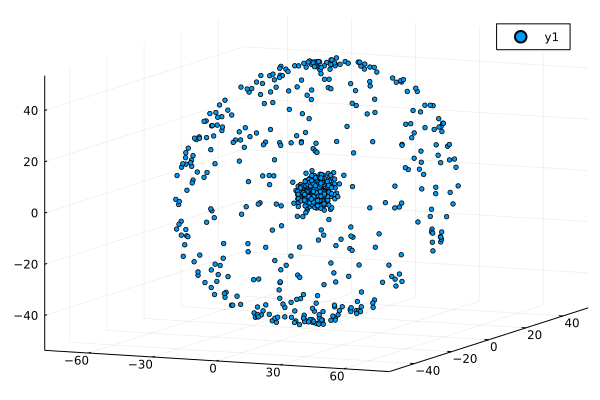

In [44]:
scatter(C[:,1],C[:,2],C[:,3],ms=2000/size(C,1),aspect_ratio=:equal)

In [45]:
S=data2clust(C,2,15,10,0.0000515)

2-element Vector{Any}:
 (544, [544, 401, 688, 607, 455, 712, 789, 662, 797, 597  …  782, 624, 493, 464, 623, 749, 621, 664, 489, 479])
 (300, [300, 192, 133, 35, 118, 168, 40, 146, 127, 67  …  84, 48, 2, 269, 380, 285, 397, 1, 296, 18])

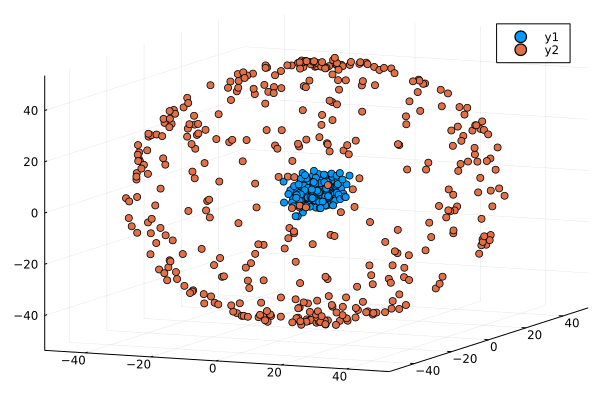

In [47]:
s1, s2= getindex.(S, 2)

scatter(C[s1,1], C[s1, 2], C[s1, 3])
scatter!(C[s2,1], C[s2, 2], C[s2, 3])


In [49]:
D = readdlm(joinpath("FCPS","01FCPSdata","Chainlink.lrn"))

1004×5 Matrix{Any}:
     "%"  1000             ""          ""          ""
     "%"     4             ""          ""          ""
     "%"     9            1           1           1
     "%"      "Key"        "C1"        "C2"        "C3"
    1       -0.452525    -0.890705    0.0230051    ""
    2        0.65285     -0.845875    0.0210845    ""
    3        0.397904     0.91345    -0.0013908    ""
    4        0.095233     1.05499     0.00628025   ""
    5        0.52399     -0.941104    0.0377623    ""
    6       -0.0262946    1.00439     0.0217916    ""
    7        0.424546     0.908192   -0.0285324    ""
    8       -0.991431    -0.274878    0.0510885    ""
    9       -1.01262     -0.0352555   0.0379796    ""
    ⋮                                             
  989        0.0839543    0.639308   -0.899185     ""
  990       -0.0088432    1.77006    -0.668781     ""
  991       -0.0479518   -0.0125675   0.263562     ""
  992       -0.0289224    1.3572     -0.878526     ""
  993      

In [50]:
D = float.(D[5:end,2:4])
size(D)

(1000, 3)

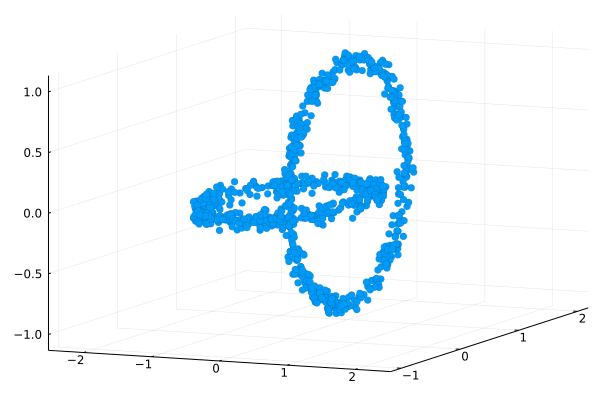

In [51]:
scatter(D[:,1],D[:,2],D[:,3],ms=4,aspect_ratio=:equal,
    markerstrokewidth=0.1,label="")

In [52]:
@time S=data2clust(D,1,10,100,0.2)

  0.026050 seconds (67.50 k allocations: 5.764 MiB)


2-element Vector{Any}:
 (439, [439, 101, 292, 424, 375, 21, 447, 472, 24, 40  …  295, 271, 409, 435, 15, 104, 209, 39, 252, 122])
 (939, [939, 601, 792, 924, 875, 521, 947, 972, 524, 540  …  795, 771, 909, 935, 515, 604, 709, 539, 752, 622])

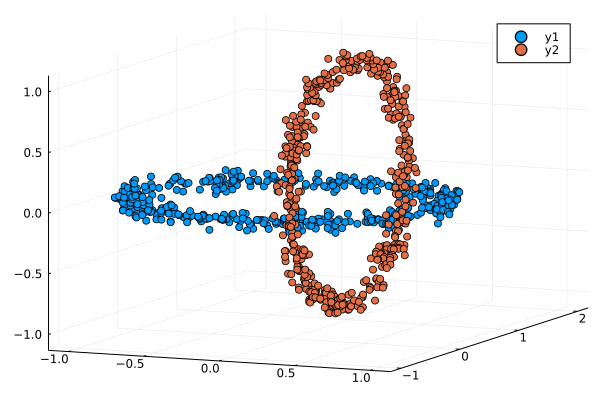

In [53]:
s1, s2= getindex.(S, 2)

scatter(D[s1,1], D[s1, 2], D[s1, 3])
scatter!(D[s2,1], D[s2, 2], D[s2, 3])

In [54]:
E = readdlm(joinpath("FCPS","01FCPSdata","EngyTime.lrn"))

4100×4 Matrix{Any}:
     "%"  4096           ""        ""
     "%"     3           ""        ""
     "%"     9          1         1
     "%"      "Key"      "C1"      "C2"
    1        1.38826    2.0761     ""
    2        2.17725    3.1023     ""
    3        0.378645   5.30761    ""
    4        3.68173    1.62268    ""
    5        2.46286    2.7779     ""
    6        1.73595    3.82709    ""
    7        1.16799    5.5181     ""
    8        1.80711    3.25099    ""
    9        3.50864    1.84339    ""
    ⋮                             
 4085        1.06589    0.051733   ""
 4086        1.15566    1.10151    ""
 4087        1.60078    0.987838   ""
 4088        2.26978    0.47362    ""
 4089        1.45623   -0.859784   ""
 4090        0.403097  -1.03698    ""
 4091        0.424346   0.696647   ""
 4092        0.909687   0.375763   ""
 4093        2.69838    0.511262   ""
 4094        1.0788     1.52615    ""
 4095        1.97489   -0.649343   ""
 4096       -0.127192  -0.763974 

In [55]:
E = float.(E[5:end,2:3]);
size(E)

(4096, 2)

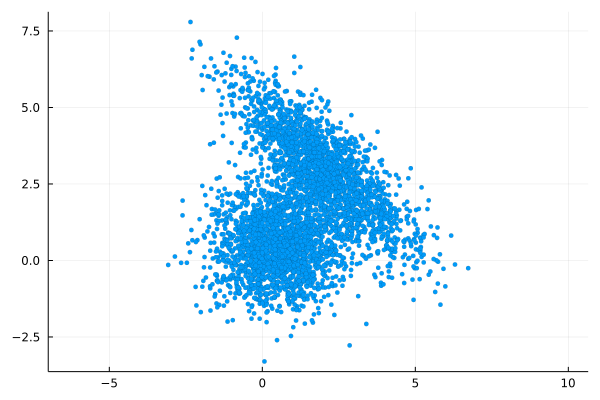

In [57]:
scatter(E[:,1],E[:,2],ms=2.7,aspect_ratio=:equal,
    markerstrokewidth=0.1,label="")

In [61]:
@time S=data2clust(E,2,1,10,0.00000001)

  0.370109 seconds (2.47 M allocations: 144.731 MiB, 9.52% gc time)


2-element Vector{Any}:
 (3336, [3336, 2381, 3676, 2557, 2222, 2088, 2831, 3062, 3371, 3955  …  2496, 2767, 2409, 2589, 3612, 3864, 2428, 2493, 2604, 3552])
 (2002, [2002, 322, 1688, 1000, 1631, 813, 1289, 1516, 1171, 39  …  1641, 565, 555, 432, 1827, 1594, 1169, 753, 1144, 765])

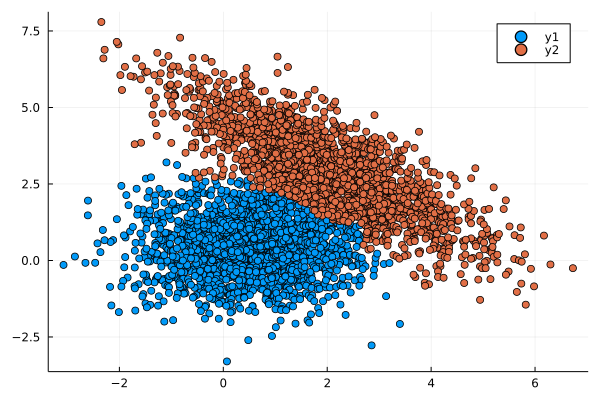

In [63]:
s1, s2= getindex.(S, 2)

scatter(E[s1,1], E[s1, 2])
scatter!(E[s2,1], E[s2, 2])